In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import random 

In [163]:
# INPUT: set path for data placement 
os.chdir(r'C:\Users\mshafin\Desktop\xavient_churn_project')
os.getcwd()
random.seed(42)

In [164]:
# INPUT: data loaded to a pandas dataframe
df = pd.read_csv('telecom_churn_training.csv')

In [165]:
#df['tenure_month_charges'] = df.apply(lambda row: row['tenure']*row['MonthlyCharges'] ,axis=1)
#df['discount_premium'] = df.apply(lambda row: row['TotalCharges']-row['tenure_month_charges'] ,axis=1)

In [166]:
# INPUT: set customer identification code and target variable
customer_identity_code = 'customerID'
target_code = 'Churn'

In [167]:
# set index for customer identification code
df = df.set_index(customer_identity_code)

In [168]:
# identify target variable
df['target'] = df[target_code]

In [169]:
# set target labels from input
label_target1 = 'Yes'
label_target0 = 'No'

In [170]:
# function to recode target levels
def dependent_col(row):
    if row['target'] == label_target1:
        val = 1  # input
    elif row['target'] == label_target0:
        val = 0  # imput
    else:
        val = 2
    return val

In [171]:
df['target'] = df.apply(dependent_col, axis=1)
print(df.loc[:,['target','Churn']].sample(5)) #check changes in target recoding

            target Churn
customerID              
2410-CIYFZ       0    No
8166-ZZTFS       1   Yes
1104-TNLZA       0    No
0164-XAIRP       0    No
3996-ZNWYK       0    No


In [172]:
# droping initial target
df = df.drop(['Churn'],axis=1)

In [173]:
feature_names = list(df.columns.values)

for column in feature_names:
    if df[column].dtypes == "object":
        print (column)
        print (df[column].value_counts(dropna=False))

gender
Male      2885
Female    2749
Name: gender, dtype: int64
Partner
No     2913
Yes    2721
Name: Partner, dtype: int64
Dependents
No     3936
Yes    1698
Name: Dependents, dtype: int64
PhoneService
Yes    5077
No      557
Name: PhoneService, dtype: int64
MultipleLines
No                  2686
Yes                 2391
No phone service     557
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    2470
DSL            1935
No             1229
Name: InternetService, dtype: int64
OnlineSecurity
No                     2763
Yes                    1642
No internet service    1229
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     2468
Yes                    1937
No internet service    1229
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     2480
Yes                    1925
No internet service    1229
Name: DeviceProtection, dtype: int64
TechSupport
No                     2776
Yes                    1629
No internet service    1229
Name: T

In [174]:
for column in feature_names:
    if df[column].dtypes != "object":
        print (column)
        print (df[column].unique())

SeniorCitizen
[0 1]
tenure
[ 1 34  2  8 10 28 13 16 58 25 69 52 71 21 12 47 72 17 27  5 46 11 70 49
 43 15 60 18 63  9  3 31 50 64 62 30 45  7 42 35 48 29 66 65 38 55 37 36
 56  6  4 33 57 61 22 20 53 14 32 40 59 24 44 19 54 41 51 68 23 26  0 39
 67]
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
target
[0 1]


In [175]:
remove_from_description = ['SeniorCitizen','target'] # remove non continious variables
removed_from_description = [x for x in feature_names if (x not in remove_from_description)]
#feature_names.remove(removed_from_description);
for column in removed_from_description:
    if df[column].dtypes != "object":
        print (column)
        print (df[column].describe())

tenure
count    5634.000000
mean       32.352680
std        24.582096
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
MonthlyCharges
count    5634.000000
mean       64.710215
std        30.179738
min        18.250000
25%        35.150000
50%        70.300000
75%        90.050000
max       118.750000
Name: MonthlyCharges, dtype: float64
TotalCharges
count    5626.000000
mean     2284.180546
std      2268.431748
min        18.800000
25%       395.725000
50%      1394.800000
75%      3807.837500
max      8684.800000
Name: TotalCharges, dtype: float64


In [176]:
# missing value treatments
# impute missing numeric columns with mean
numeric_columns_mean = ['MonthlyCharges','tenure','TotalCharges'] # populate with numeric columns
# impute missing numeric columns with zero
numeric_columns_zero = [] # populate with numeric columns
scale_columns = numeric_columns_mean + numeric_columns_zero
 

In [177]:
# for mean imputation
for column in numeric_columns_mean:
    if df[column].dtypes in ["int64","float64"] :
        df[column] = df[column].fillna(df[column].mean())
# for 0 imputation
for column in numeric_columns_zero:
    if df[column].dtypes in ["int64","float64"] :
        df[column] = df[column].fillna(0)

In [178]:
from sklearn.preprocessing import scale
for column in scale_columns:
    if df[column].dtypes in ["int64","float64"] :
        df[column] = scale(df[column].astype('float64'))

In [179]:
# object variables converted to categories for cat.codes
object_columns = df.select_dtypes(['object']).columns

In [180]:
object_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [181]:
for column in object_columns:
    if df[column].dtypes=="object":
        print(column)
        df[column] = df[column].fillna(-9999)
        print(df[column].value_counts())

gender
Male      2885
Female    2749
Name: gender, dtype: int64
Partner
No     2913
Yes    2721
Name: Partner, dtype: int64
Dependents
No     3936
Yes    1698
Name: Dependents, dtype: int64
PhoneService
Yes    5077
No      557
Name: PhoneService, dtype: int64
MultipleLines
No                  2686
Yes                 2391
No phone service     557
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    2470
DSL            1935
No             1229
Name: InternetService, dtype: int64
OnlineSecurity
No                     2763
Yes                    1642
No internet service    1229
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     2468
Yes                    1937
No internet service    1229
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     2480
Yes                    1925
No internet service    1229
Name: DeviceProtection, dtype: int64
TechSupport
No                     2776
Yes                    1629
No internet service    1229
Name: T

In [182]:
for column in object_columns:
    if df[column].dtypes=="object":
        df[column] = df[column].astype('category')

In [183]:
df[object_columns] = df[object_columns].apply(lambda x: x.cat.codes)

In [184]:
for column in object_columns:
    print (column)
    print(df[column].value_counts())

gender
1    2885
0    2749
Name: gender, dtype: int64
Partner
0    2913
1    2721
Name: Partner, dtype: int64
Dependents
0    3936
1    1698
Name: Dependents, dtype: int64
PhoneService
1    5077
0     557
Name: PhoneService, dtype: int64
MultipleLines
0    2686
2    2391
1     557
Name: MultipleLines, dtype: int64
InternetService
1    2470
0    1935
2    1229
Name: InternetService, dtype: int64
OnlineSecurity
0    2763
2    1642
1    1229
Name: OnlineSecurity, dtype: int64
OnlineBackup
0    2468
2    1937
1    1229
Name: OnlineBackup, dtype: int64
DeviceProtection
0    2480
2    1925
1    1229
Name: DeviceProtection, dtype: int64
TechSupport
0    2776
2    1629
1    1229
Name: TechSupport, dtype: int64
StreamingTV
0    2232
2    2173
1    1229
Name: StreamingTV, dtype: int64
StreamingMovies
2    2205
0    2200
1    1229
Name: StreamingMovies, dtype: int64
Contract
0    3096
2    1363
1    1175
Name: Contract, dtype: int64
PaperlessBilling
1    3363
0    2271
Name: PaperlessBilling, dty

In [189]:
import pandas as pd
import scipy.stats as scs


def categories(series):
    return range(int(series.min()), int(series.max()) + 1)


def chi_square_of_df_cols(df, col1, col2):
    df_col1, df_col2 = df[col1], df[col2]

    result = [[sum((df_col1 == cat1) & (df_col2 == cat2))
               for cat2 in categories(df_col2)]
              for cat1 in categories(df_col1)]

    return scs.chi2_contingency(result)

In [195]:
print(chi_square_of_df_cols(df, 'PhoneService', 'target'))

(0.4058564336289541, 0.5240801438954494, 1, array([[ 409.19826056,  147.80173944],
       [3729.80173944, 1347.19826056]]))


In [119]:
from sklearn.model_selection import train_test_split

In [120]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'target'],
      dtype='object')

In [121]:
df1 = df.drop(['target','gender','PhoneService','TotalCharges'],axis=1).copy()

In [122]:
#df1 = df.copy()
#df1.shape
df1.columnsg

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges'],
      dtype='object')

In [123]:
X = df1.values
y = df[['target']].values
X.shape,y.shape

((5634, 16), (5634, 1))

In [124]:
feature_selected = X.shape[1]
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
no_features = feature_selected # Input
model = RandomForestRegressor()
rfe = RFE(model, no_features)
fit = rfe.fit(X, y)


D:\Users\mshafin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [125]:
print("Num Features: " + str(fit.n_features_))
print("Selected Features: " + str(fit.support_))
print("Feature Ranking: " + str(fit.ranking_))

Num Features: 16
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [126]:
df1.columns[fit.support_]

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges'],
      dtype='object')

In [127]:
X = df[df1.columns[fit.support_]].values
y = df['target'].values
#array1 = 
#X = array1.values
#y = y.values
X.shape,y.shape

((5634, 16), (5634,))

In [128]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=21,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3943, 16), (1691, 16), (3943,), (1691,))

('GBM', 0.7948242626742915, 0.014263574764767483)
('RF', 0.7831504208700123, 0.022191014305984743)
('DT', 0.7293844374477928, 0.023293606680868762)
('ADA', 0.7953318768874896, 0.023159142343665312)


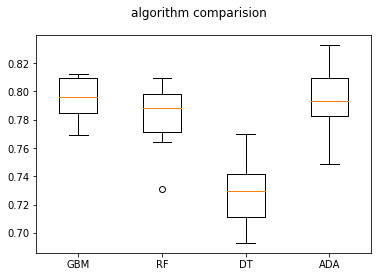

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn import model_selection
import matplotlib.pyplot as plt

# generate list of models  
models = []
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('ADA', AdaBoostClassifier()))


# check model performance
results = []
names = []
seed = 7
scoring='accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print (msg)

# compare algorithms
fig = plt.figure()
fig.suptitle("algorithm comparision")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [130]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("accuracy :" +str(accuracy))
    print("matrix :")
    print(matrix)
    print("report :")
    print(report)
    return accuracy

In [131]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier

In [132]:
from pprint import pprint
GBM = GradientBoostingClassifier()
from sklearn.model_selection import RandomizedSearchCV
# Number of iterations needed
n_estimators = [int(x) for x in np.linspace(100, 2000, num = 20)]
learning_rate = [0.1, 0.05, 0.02, 0.01]
max_features = ['sqrt','auto','log2','None','1','0.1']
loss = ['deviance', 'exponential']
max_depth = [4, 6, 8]
criterion = ['friedman_mse']
min_samples_split = [2, 5, 10]
min_samples_leaf = [20,50,100,150]
random_state = [21]
# Create the random grid
random_grid_gbm = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'loss':loss,
               'max_depth': max_depth,
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state}
pprint(random_grid_gbm)

{'criterion': ['friedman_mse'],
 'learning_rate': [0.1, 0.05, 0.02, 0.01],
 'loss': ['deviance', 'exponential'],
 'max_depth': [4, 6, 8],
 'min_samples_leaf': [20, 50, 100, 150],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200,
                  1300,
                  1400,
                  1500,
                  1600,
                  1700,
                  1800,
                  1900,
                  2000],
 'random_state': [21]}


In [133]:
GBM = GradientBoostingClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
gbm_random = RandomizedSearchCV(estimator = GBM, param_distributions = random_grid_gbm, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)


In [134]:
# Fit the random search model
gbm_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   27.8s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'learning_rate': [0.1, 0.05, 0.02, 0.01], 'loss': ['deviance', 'exponential'], 'max_depth': [4, 6, 8], 'criterion': ['friedman_mse'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [20, 50, 100, 150], 'random_state': [21]},
          pre_

In [135]:
gbm_best_accuracy = evaluate(gbm_random,X_test,y_test)

accuracy :0.8101714961561206
matrix :
[[1116   99]
 [ 222  254]]
report :
             precision    recall  f1-score   support

          0       0.83      0.92      0.87      1215
          1       0.72      0.53      0.61       476

avg / total       0.80      0.81      0.80      1691



[ 1  2  5 10  8 11  0  7 13  4  6  9 14 12  3 15]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


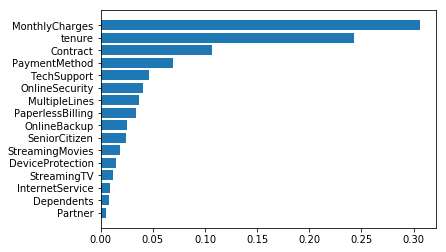

['SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'MultipleLines'
 'InternetService' 'OnlineSecurity' 'OnlineBackup' 'DeviceProtection'
 'TechSupport' 'StreamingTV' 'StreamingMovies' 'Contract'
 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges']
[0.0247186  0.00497696 0.00825375 0.24273984 0.03630115 0.00918182
 0.04044283 0.02516361 0.01496176 0.04649415 0.01187417 0.01862178
 0.10703805 0.03369106 0.06979913 0.30574135]


In [161]:
feature_names=df[df1.columns[fit.support_]].columns
feature_importance = gbm_random.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
print(sorted_idx)
print(pos)
print(type(np.array(feature_names)))
print(type(feature_importance))


# In[183]:


plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])

feature_names[sorted_idx]
plt.show()
print((np.array(feature_names)))
print(feature_importance)

In [136]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200,
                  1300,
                  1400,
                  1500,
                  1600,
                  1700,
                  1800,
                  1900,
                  2000]}


In [137]:
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   37.7s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn',

In [138]:
rf_best_accuracy = evaluate(rf_random,X_test,y_test)

accuracy :0.8024837374334713
matrix :
[[1128   87]
 [ 247  229]]
report :
             precision    recall  f1-score   support

          0       0.82      0.93      0.87      1215
          1       0.72      0.48      0.58       476

avg / total       0.79      0.80      0.79      1691



In [139]:
# import pickle
import pickle

# save the model to disk
filename1 = 'finalized_gbm.sav'
pickle.dump(gbm_random, open(filename1, 'wb'))

# save the model to disk
filename2 = 'finalized_rf.sav'
pickle.dump(rf_random, open(filename2, 'wb'))

[ 2 11 10  0  1  4 13  8  7  5 14  9  6 12 15  3]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


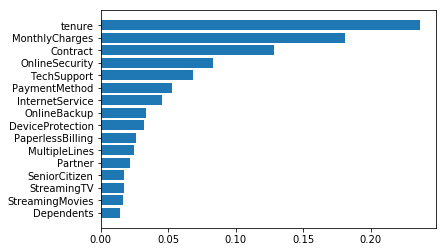

['SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'MultipleLines'
 'InternetService' 'OnlineSecurity' 'OnlineBackup' 'DeviceProtection'
 'TechSupport' 'StreamingTV' 'StreamingMovies' 'Contract'
 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges']
[0.01753963 0.02205527 0.01433337 0.23602118 0.02494541 0.0455041
 0.08323846 0.03389458 0.03184911 0.0683746  0.0174501  0.01637778
 0.1284392  0.02626146 0.05270103 0.18101472]


In [140]:
feature_names=df[df1.columns[fit.support_]].columns
feature_importance = rf_random.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
print(sorted_idx)
print(pos)
print(type(np.array(feature_names)))
print(type(feature_importance))


# In[183]:


plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])

feature_names[sorted_idx]
plt.show()
print((np.array(feature_names)))
print(feature_importance)

In [158]:
from pprint import pprint
ADA = AdaBoostClassifier()
from sklearn.model_selection import RandomizedSearchCV
# Number of iterations needed
n_estimators = [int(x) for x in np.linspace(100, 2000, num = 20)]
learning_rate = [0.1, 0.05, 0.02, 0.01]
algorithm  = ['SAMME', 'SAMME.R']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
random_state = [21]

# Create the random grid
random_grid_ada = {'n_estimators': n_estimators,
 #                 'learning_rate': learning_rate,
                   'algorithm':algorithm,
 #                 'max_depth': max_depth,
 #                 'min_samples_leaf': min_samples_leaf,
                   'random_state': random_state}
pprint(random_grid_ada)

{'algorithm': ['SAMME', 'SAMME.R'],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200,
                  1300,
                  1400,
                  1500,
                  1600,
                  1700,
                  1800,
                  1900,
                  2000],
 'random_state': [21]}


In [159]:
# First create the base model to tune
ada = AdaBoostClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
ada_random = RandomizedSearchCV(estimator = ada, param_distributions = random_grid_ada, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
ada_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   29.9s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'algorithm': ['SAMME', 'SAMME.R'], 'random_state': [21]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [160]:
ada_best_accuracy = evaluate(ada_random,X_test,y_test)

accuracy :0.7971614429331756
matrix :
[[1099  116]
 [ 227  249]]
report :
             precision    recall  f1-score   support

          0       0.83      0.90      0.87      1215
          1       0.68      0.52      0.59       476

avg / total       0.79      0.80      0.79      1691

